In [156]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

class State(TypedDict):
    should_launch: bool

In [157]:
def start_engines(state):
    print("Starting engines...")
    return state

def launch_spaceship(state):
    print("Launching spaceship!")
    return state

In [158]:
def human_review(state):
    print("Perform human review")
    return state

def route_chooser(state):
    if state['should_launch']:
        return "launch_spaceship"
    else:
        print("Launch aborted.")
        return END

In [159]:
graph = StateGraph(State)

graph.add_node("start_engines", start_engines)
graph.add_node("human_review", human_review)
graph.add_node("launch_spaceship", launch_spaceship)

# Add edges
graph.add_edge(START, "start_engines")
graph.add_edge("start_engines", "human_review")
graph.add_conditional_edges("human_review", route_chooser)
graph.add_edge("launch_spaceship", END)

In [160]:
memory = MemorySaver()
app = graph.compile(checkpointer=memory, interrupt_before=["human_review"])

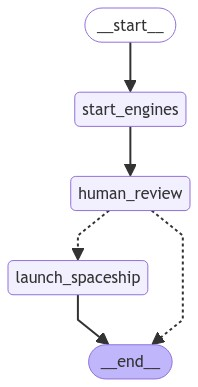

In [161]:
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [162]:
initial_input = {"should_launch": False}
thread = {"configurable": {"thread_id": "1"}}
result = app.invoke(initial_input, thread)

Starting engines...


In [163]:
app.get_state(thread).next

('human_review',)

In [164]:
user_input = input("Do you confirm the launch? (yes/no): ")
should_launch = user_input == 'yes'

Do you confirm the launch? (yes/no):  yes


In [124]:
app.get_state(thread).values

{'should_launch': False}

In [126]:
app.update_state(thread, {'should_launch': should_launch})

{'configurable': {'thread_id': '1',
  'thread_ts': '1ef6c8be-495a-679a-8003-aa3dcce72d4e'}}

In [127]:
app.get_state(thread).values

{'should_launch': True}

In [128]:
result = app.invoke(None, thread)

Perform human review
Launching spaceship!


In [129]:
app.get_state(thread).next

()